# TP 3.1 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [48]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [49]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = -0.29074, df = 18, p-value = 0.7746
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0824867  0.8193047
sample estimates:
 mean of x  mean of y 
0.04478757 0.17637857 


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.</li>
        <li>Pourquoi faut-il supposer que les deux échantillons aient la même variance ? En particulier, quelle est la loi de la variable
            \begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}
        </li>
        <li>En déduire la loi de la statistique de test
            \begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}
        </li>
        <li>Vérifier le calcul de la statistique de test donné dans <code>resultat_test</code>.</li>
        <li>Quelle est la p-valeur du test <code>resultat_test</code> ? Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ? Est-ce cohérent avec notre simulation initiale ?</li>
        <li>Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.</li>
    </ol>
</div>

In [50]:
# À FAIRE
#Ho : there is no difference in means and they are equal to 0
#H1 : true difference in means is not equal to 0
#Q2 : besoin d'avoir la même variance pour pouvoir retrouver une loi qu'on connait
# ici la variable qu'on trouve est un estimateur de cette variance commune et elle suit CHI2
# Q3 : Le test T suit une loi de Student à p+q-2 degrés de liberté
sigsqrd <- (1/18)*(var(x)+var(y))
T <- sqrt(100/20)*(mean(x)-mean(y))/sqrt(sigsqrd)
T
# Q4 je ne trouve pas la même t = -0.68363  et T=  -2.05088183894138 soit *3
# Q5 p-value = 0.5029
# on accepte la H0 car p valeur > 0.05
# et la t-stat est dans l'intervalle de confiance
# 


[1] -0.8722169

Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [51]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

In [52]:
# À FAIRE
#p_valeur <- matrix(apply(X, 1, function(x) t.test(x, Y[] , var.equal=TRUE)),nrow =  200)
p_valeur <- c()
for (i in 1:1000){
    p_valeur[i] <- t.test(X[i,], Y[i,] , var.equal=TRUE)$p.value
}
#length(p_valeur)
#p_valeur



In [53]:
nombre <-0
for (i in 1:1000){
    if (p_valeur[i]<0.05){
        nombre= nombre +1
    }
}
nombre

[1] 65

In [54]:
which.min(p_valeur)
#il faut rejetter pour ce test

[1] 480

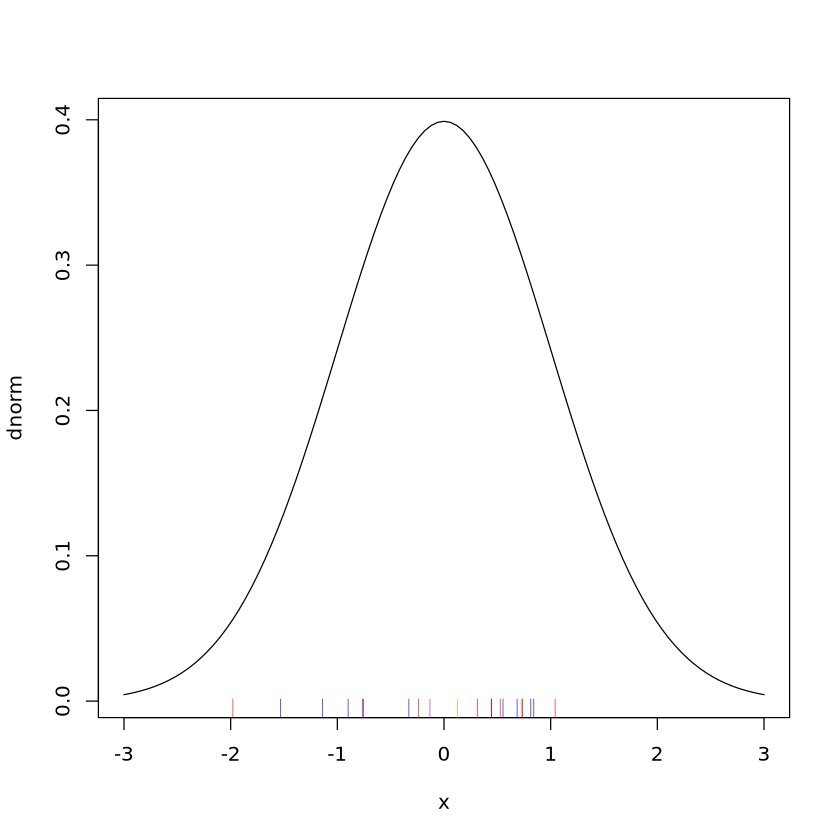

In [55]:
plot(dnorm, -3, 3, type="l")
rug(X[69,], col = "blue")
rug(Y[69,],col="red")
rug(mean(X[69,]),col="purple")
rug(mean(Y[69,]),col="orange")